# Exploratory data analysis on breast cancer data

#### importing necessary packages

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

#### importing data

In [9]:
df=pd.read_csv('data.csv')

In [10]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
# removing the last(Unnamed: 32) column as it is empty
df = df.drop('Unnamed: 32', axis = 1)
df.shape

(569, 32)

In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df['id'].nunique()

569

In [18]:
# removing the id column since it's unique and not useful for further exploration
df = df.drop('id', axis = 1)

## Visualization

### Diagnosis Distribution

Number of Benign Tumors  357
Number of Malignant Tumors  212


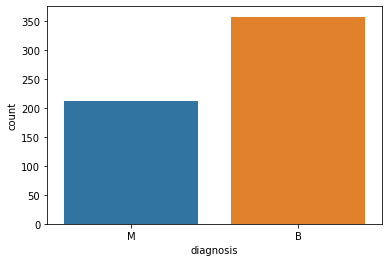

In [19]:
ax = sns.countplot(df['diagnosis'], label = 'Count')
B, M = df['diagnosis'].value_counts()
print( 'Number of Benign Tumors ', B)
print( 'Number of Malignant Tumors ', M)

### bivarate analysis

In [31]:
def bar_plot(x,y):
    fig=plt.figure(figsize=(6,6))
    sns.barplot(x=x,y=y,data=df)
    plt.title(f'{x} vs {y}')

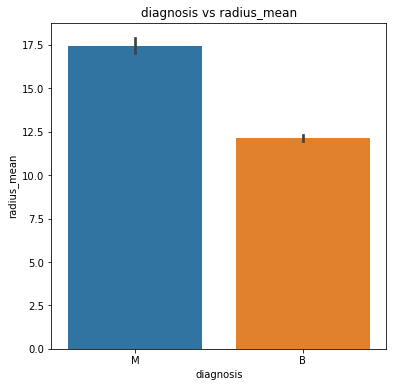

In [32]:
bar_plot('diagnosis','radius_mean')

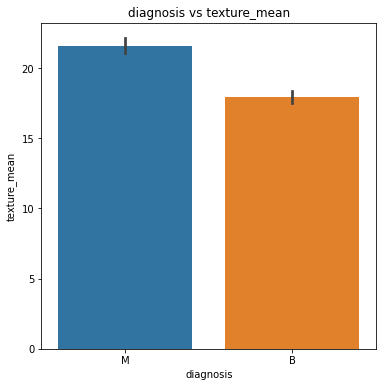

In [33]:
bar_plot('diagnosis','texture_mean')

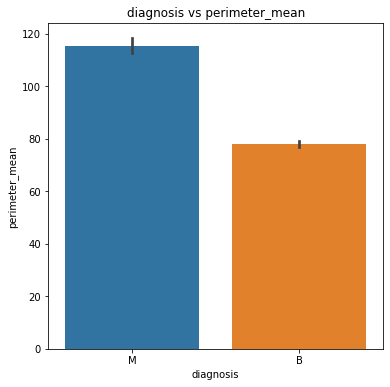

In [34]:
bar_plot('diagnosis','perimeter_mean')

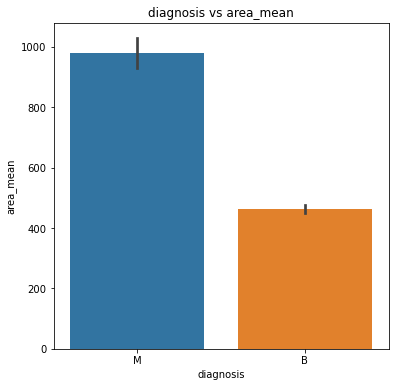

In [35]:
bar_plot('diagnosis','area_mean')

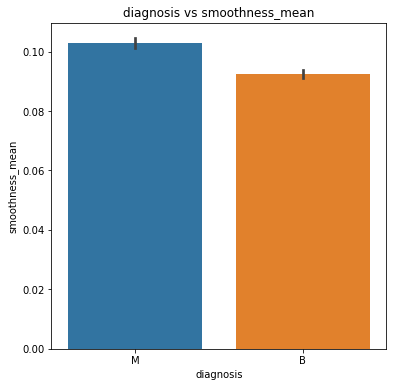

In [36]:
bar_plot('diagnosis','smoothness_mean')

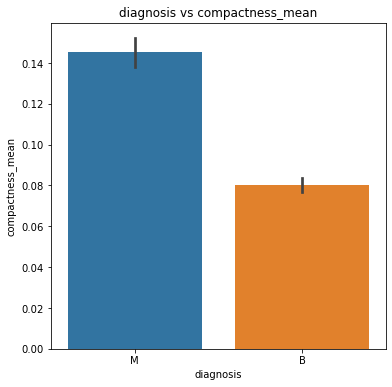

In [37]:
bar_plot('diagnosis','compactness_mean')

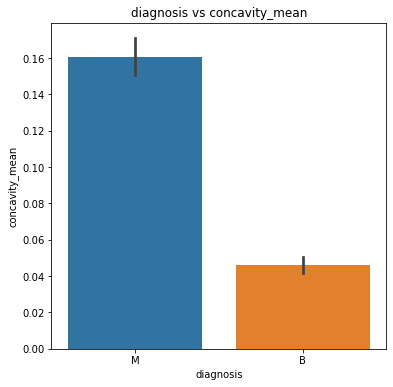

In [38]:
bar_plot('diagnosis','concavity_mean')

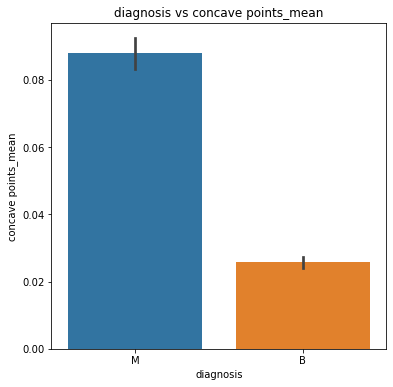

In [39]:
bar_plot('diagnosis','concave points_mean')

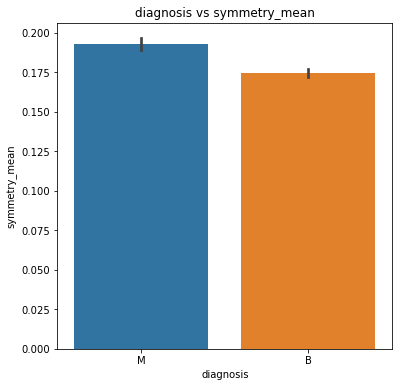

In [41]:
bar_plot('diagnosis','symmetry_mean')

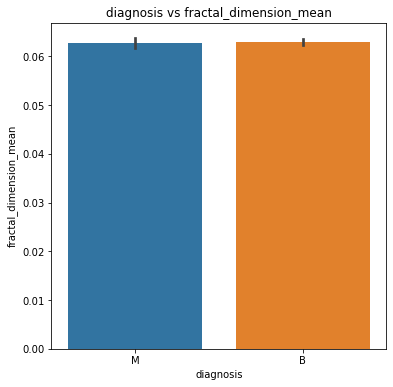

In [43]:
bar_plot('diagnosis','fractal_dimension_mean')

#### From the above plots, we can see the radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean concavity_mean, ,concave points_mean, symmetry_mean,fractal_dimension_mean  are higher in the malign cells when compared the benign cells in terms of mean of these parameters, and similarly rest of the 20 columns which are again standard error and worst of all these 10 parameters.

##  correlation

<AxesSubplot:>

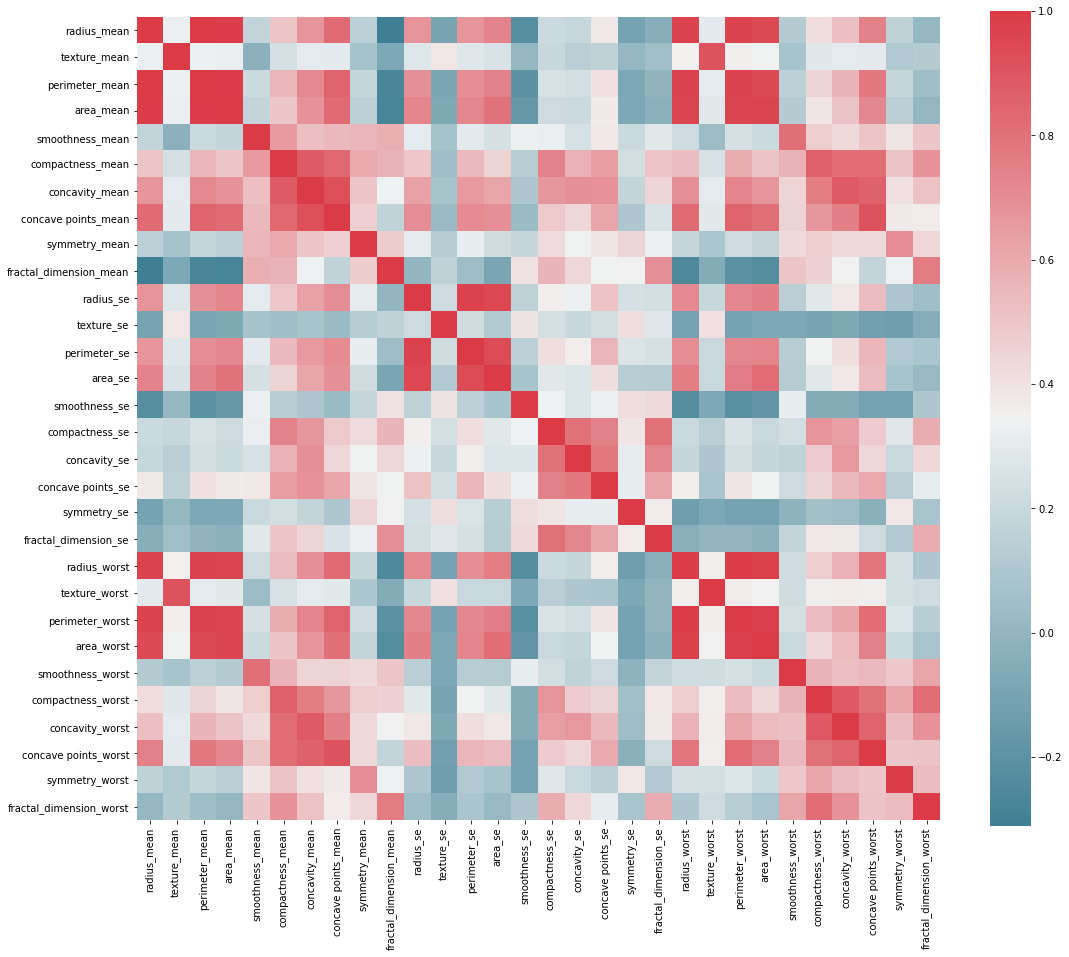

In [46]:
f, ax = plt.subplots(figsize = ( 12, 10))
sns.heatmap( df.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax = ax )